In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load the data
df = pd.read_csv('/content/Weather.csv')

# Show the first few rows of the dataset
df.head()


,datetime,air_pressure_9am,air_temp,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation,rain_duration_9am,relative_humidity,relative_humidity_3pm,Average_humidity
0,01-01-2021,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,39.290000
1,02-01-2021,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597,21.877647
2,03-01-2021,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,11.680000
3,04-01-2021,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,12.465825
4,05-01-2021,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,84.575000


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Get basic information about the dataset
print("\nDataset info:")
df.info()

# Get basic statistics of numerical columns
print("\nStatistical Summary:")
df.describe()


Missing values:
 datetime                  0
air_pressure_9am          3
air_temp                  5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation         6
rain_duration_9am         3
relative_humidity         0
relative_humidity_3pm     0
Average_humidity          0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                1095 non-null   object 
 1   air_pressure_9am        1092 non-null   float64
 2   air_temp                1090 non-null   float64
 3   avg_wind_direction_9am  1091 non-null   float64
 4   avg_wind_speed_9am      1092 non-null   float64
 5   max_wind_direction_9am  1092 non-null   float64
 6   max_wind_speed_9am      1091 non-null   float64
 7   rain_accumulation       1089 n

,air_pressure_9am,air_temp,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation,rain_duration_9am,relative_humidity,relative_humidity_3pm,Average_humidity
count,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000,1095.000000
mean,918.882551,64.933002,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727,34.793065
std,3.184161,11.175514,69.137859,4.552814,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079,23.288738
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000,7.005000
25%,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000,16.410000
50%,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000,24.830000
75%,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000,48.475000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000,92.175000


In [ ]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
# Filling missing values with the mean for numerical columns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Alternatively, you can drop rows with missing values (uncomment if desired)
# df.dropna(inplace=True)

# Convert 'datetime' to datetime type if applicable
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y', errors='coerce')


Missing Values:
datetime                  0
air_pressure_9am          3
air_temp                  5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation         6
rain_duration_9am         3
relative_humidity         0
relative_humidity_3pm     0
Average_humidity          0
dtype: int64


<ipython-input-3-909e1c86cd44>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
print("\nCleaned Dataset Info:")
print(df.info())
# Display the cleaned statistical summary
print("\nCleaned Statistical Summary:")
print(df.describe())
# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())
# Drop duplicates if any
df.drop_duplicates(inplace=True)


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime                1093 non-null   datetime64[ns]
 1   air_pressure_9am        1095 non-null   float64       
 2   air_temp                1095 non-null   float64       
 3   avg_wind_direction_9am  1095 non-null   float64       
 4   avg_wind_speed_9am      1095 non-null   float64       
 5   max_wind_direction_9am  1095 non-null   float64       
 6   max_wind_speed_9am      1095 non-null   float64       
 7   rain_accumulation       1095 non-null   float64       
 8   rain_duration_9am       1095 non-null   float64       
 9   relative_humidity       1095 non-null   float64       
 10  relative_humidity_3pm   1095 non-null   float64       
 11  Average_humidity        1095 non-null   float64       
dtypes: datetime64[ns](1), flo

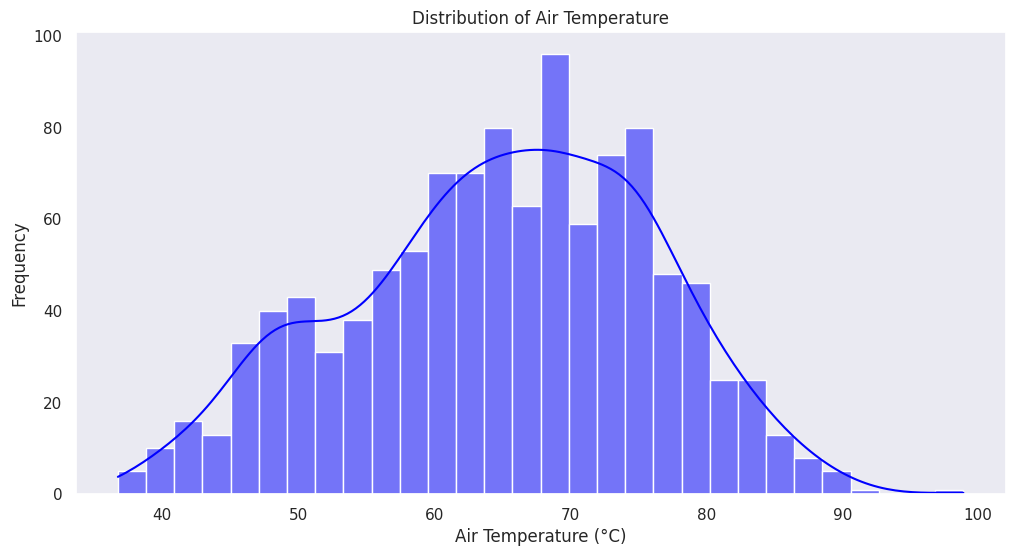

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['air_temp'], bins=30, kde=True, color='blue')
plt.title('Distribution of Air Temperature')
plt.xlabel('Air Temperature (°C)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

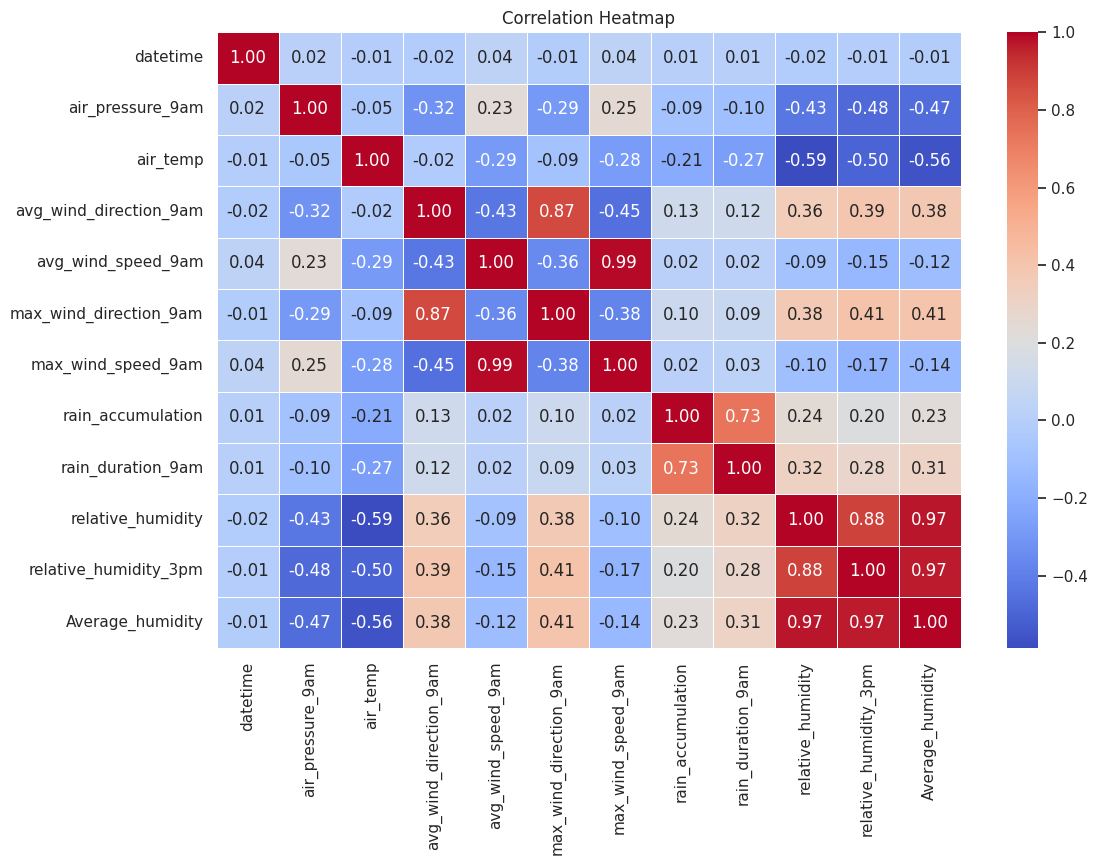

In [ ]:
# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

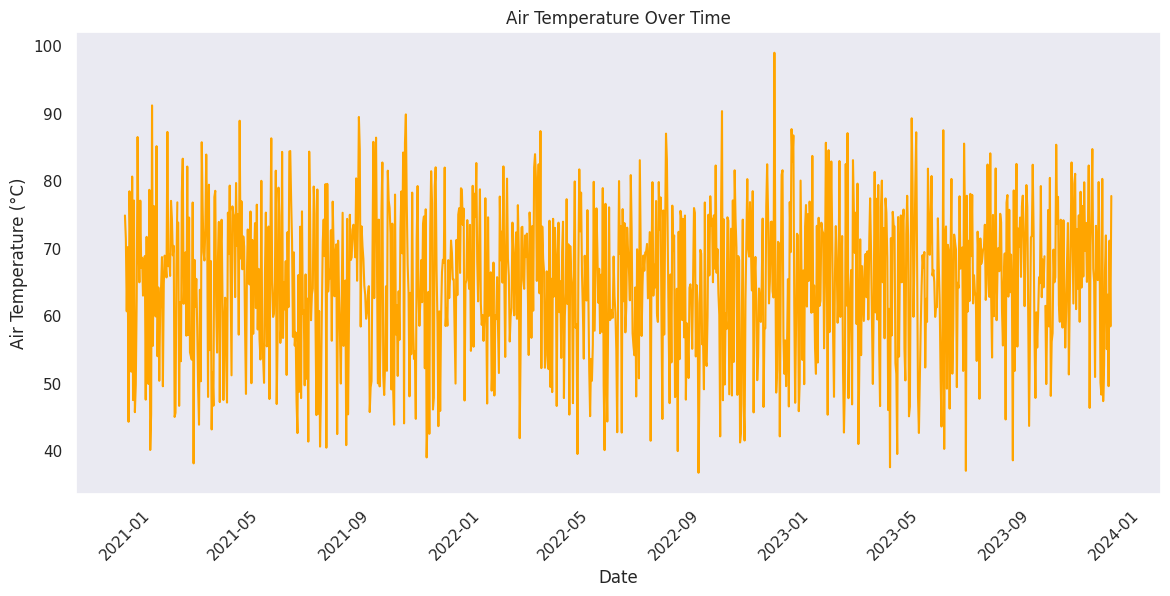

In [ ]:
# Visualize air temperature over time if 'datetime' column exists
if 'datetime' in df.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(df['datetime'], df['air_temp'], color='orange')
    plt.title('Air Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Air Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

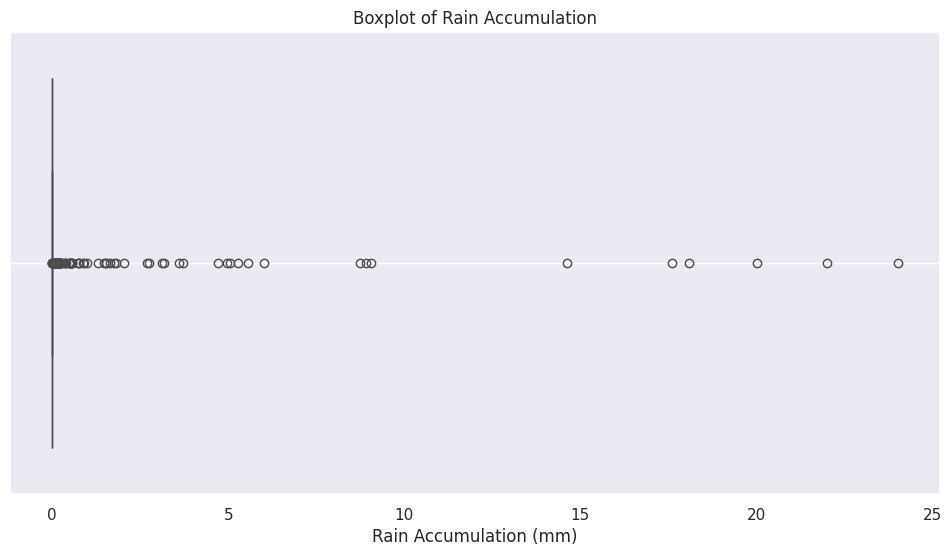

In [ ]:
# Visualize rain accumulation
plt.figure(figsize=(12, 6))
sns.boxplot(x='rain_accumulation', data=df)
plt.title('Boxplot of Rain Accumulation')
plt.xlabel('Rain Accumulation (mm)')
plt.grid()
plt.show()


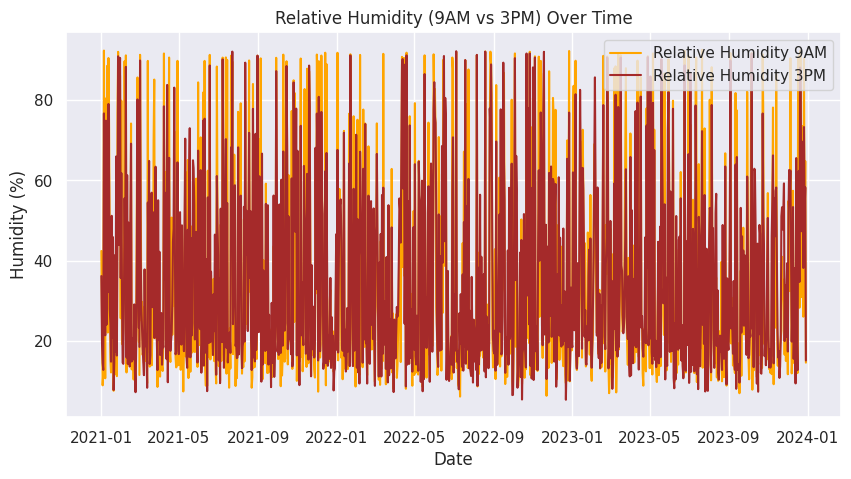

In [ ]:
# Plot relative humidity at 9am vs 3pm
plt.figure(figsize=(10,5))
plt.plot(df['datetime'], df['relative_humidity'], label='Relative Humidity 9AM', color='orange')
plt.plot(df['datetime'], df['relative_humidity_3pm'], label='Relative Humidity 3PM', color='brown')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Relative Humidity (9AM vs 3PM) Over Time')
plt.legend()
plt.show()

In [ ]:
df_cleaned = df.dropna()

# Check the dataset structure
print(df_cleaned.info())



<class 'pandas.core.frame.DataFrame'>
Index: 1093 entries, 0 to 1094
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime                1093 non-null   datetime64[ns]
 1   air_pressure_9am        1093 non-null   float64       
 2   air_temp                1093 non-null   float64       
 3   avg_wind_direction_9am  1093 non-null   float64       
 4   avg_wind_speed_9am      1093 non-null   float64       
 5   max_wind_direction_9am  1093 non-null   float64       
 6   max_wind_speed_9am      1093 non-null   float64       
 7   rain_accumulation       1093 non-null   float64       
 8   rain_duration_9am       1093 non-null   float64       
 9   relative_humidity       1093 non-null   float64       
 10  relative_humidity_3pm   1093 non-null   float64       
 11  Average_humidity        1093 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 111.0

In [ ]:

# Feature selection: Choose rain accumulation, relative humidity, and temperature
features = ['rain_accumulation', 'relative_humidity', 'relative_humidity_3pm']
target = 'air_temp'

# Split the data into features (X) and target (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Show the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:\n", coefficients)

# Inference: Analyze the coefficients
for feature, coef in zip(features, model.coef_):
    if coef > 0:
        print(f"The feature '{feature}' has a positive relationship with air temperature.")
    else:
        print(f"The feature '{feature}' has a negative relationship with air temperature.")


Mean Squared Error: 90.5737290994879
R-squared: 0.27054336350075614

Model Coefficients:
                        Coefficient
rain_accumulation        -0.502640
relative_humidity        -0.288701
relative_humidity_3pm     0.046471
The feature 'rain_accumulation' has a negative relationship with air temperature.
The feature 'relative_humidity' has a negative relationship with air temperature.
The feature 'relative_humidity_3pm' has a positive relationship with air temperature.
